#### Part 1

In [1]:
from bs4 import BeautifulSoup as bs
import requests

url = 'https://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201901&subjId=DNSC'

r = requests.get(url)
data = r.text    
soup = bs(data, "html.parser")
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of rivers by discharge - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_rivers_by_discharge","wgTitle":"List of rivers by discharge","wgCurRevisionId":868757186,"wgRevisionId":868757186,"wgArticleId":973344,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles lacking reliable references","Articles lacking reliable references from September 2009","Webarchive template wayback links","Pages with citations lacking titles","Pages with citations having bare URLs","Lists of rivers"],"wgBreakFrames":false,"wgPageContentLanguage":"en",

In [3]:
allRows = soup.findAll('tr',{'align':'center'})
tableData = []
for row in allRows:
    eachRow = []
    cells = row.findAll('td')
    for cell in cells:
        eachRow.append(str(cell.text.strip()))
    # eachRow[2] = eachRow[2][:4]    # Without this there is some noise out there
    tableData.append(eachRow)

In [5]:
allRows

[<tr align="center" class="tableHeaderFont" style="font-weight:bold;height:20px;">
 <td>STATUS</td>
 <td>CRN</td>
 <td>SUBJECT</td>
 <td>SECT</td>
 <td>COURSE</td>
 <td>CREDIT</td>
 <td>INSTR.</td>
 <td>BLDG/RM</td>
 <td>DAY/TIME</td>
 <td>FROM / TO</td>
 <td> </td>
 </tr>, <tr align="center" class="tableRow1Font coursetable crseRow1">
 <td>OPEN</td>
 <td>47771</td>
 <td>
 <span style="font-weight:bold;">
 				DNSC
 			</span>
 <a href="http://bulletin.gwu.edu/search/?P=DNSC+1001" target="_blank">
 <span style="font-weight:bold;">
 					1001
 				</span>
 </a>
 </td>
 <td>10</td>
 <td>Business Analytics I: Statistics for Descriptive and Predictive Analytics</td>
 <td>3.00</td>
 <td></td>
 <td><a href="http://virtualtour.gwu.edu/#TOMP" target="_blank">TOMP</a> 301</td>
 <td>TR<br/>11:10AM - 12:25PM</td>
 <td>01/14/19 - 04/29/19</td>
 <td>
 </td>
 </tr>, <tr align="center" class="tableRow2Font coursetable crseRow1">
 <td>OPEN</td>
 <td>47772</td>
 <td>
 <span style="font-weight:bold;">
 

In [4]:
labels = tableData.pop(0) # keep for later use

In [5]:
import pandas as pd
df = pd.DataFrame.from_records(tableData, columns=labels)
df.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC\n\t\t\t\n\n\n\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC\n\t\t\t\n\n\n\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC\n\t\t\t\n\n\n\t\t\t\t\t3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC\n\t\t\t\n\n\n\t\t\t\t\t4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC\n\t\t\t\n\n\n\t\t\t\t\t4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,


In [6]:
df['SUBJECT'] = df['SUBJECT'].str.replace("\n","")
df.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC\t\t\t\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC\t\t\t\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC\t\t\t\t\t\t\t\t3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC\t\t\t\t\t\t\t\t4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC\t\t\t\t\t\t\t\t4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,


In [7]:
df['SUBJECT'] = df['SUBJECT'].str.replace("\t","")
df

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,
0,OPEN,47771,DNSC1001,10,Business Analytics I: Statistics for Descripti...,3.00,,TOMP 301,TR11:10AM - 12:25PM,01/14/19 - 04/29/19,
1,OPEN,47772,DNSC2001,10,Business Analytics II: Predictive and Prescrip...,3.00,"Prasad, S",FNGR 223,T12:45PM - 03:15PM,01/14/19 - 04/29/19,
2,OPEN,47773,DNSC3403,10,Decision Models,3.00,"Jarrah, A",ROME 205,TR02:20PM - 03:35PM,01/14/19 - 04/29/19,
3,OPEN,47774,DNSC4279,10,Data Mining,3.00,"Prasad, S",COR 204,M12:45PM - 03:15PM,01/14/19 - 04/29/19,
4,OPEN,47775,DNSC4900,10,Supply Chain Management,3.00,"Matta, M",DUQUES 652,R12:45PM - 03:15PM,01/14/19 - 04/29/19,
5,OPEN,42373,DNSC6202,10,Statistics for Managers,3.00,"Khamooshi, H",DUQUES 258,W07:10PM - 09:40PM,01/14/19 - 04/29/19,
6,OPEN,47930,DNSC6209,10,Forecasting for Analytics,1.50,"Yenigun, D",DUQUES 258,R07:10PM - 09:40PM,03/18/19 - 04/29/19,
7,WAITLIST,47776,DNSC6210,10,Decision and Risk Analytics,1.50,"Delquie, P",ROME 350,T07:10PM - 09:40PM,03/18/19 - 04/29/19,
8,OPEN,45971,DNSC6210,11,Decision and Risk Analytics,1.50,"Delquie, P",DUQUES 652,F03:30PM - 06:00PM,03/18/19 - 04/29/19,
9,OPEN,45972,DNSC6211,10,Programming for Analytics,3.00,"Kanungo, S",DUQUES 258,W04:30PM - 07:00PM,01/14/19 - 04/29/19,


In [8]:
df.to_csv("DNSC course.csv", index=False)

#### Part 2

In [9]:
OPEN = df.STATUS[df['STATUS'] == 'OPEN'].count()
WAIT = df.STATUS[df['STATUS'] == 'WAITLIST'].count()

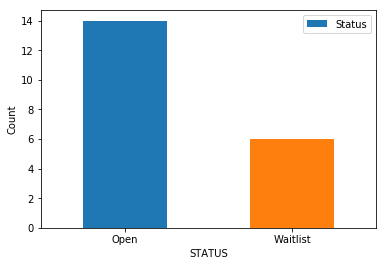

In [11]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'Cat':['Open', 'Waitlist'], 'Status':[OPEN,WAIT]})
ax = df.plot.bar(x='Cat', y='Status', rot=0)
ax.set_xlabel("STATUS")
ax.set_ylabel("Count")
plt.show()

#### Part 3

Please see other files in folder